In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier





# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [2]:
Trained_Data = pd.read_csv("../input/nslkdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("../input/nslkdd/KDDTest+.txt" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [3]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
Tested_Data

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


---------
## Columns Modification

In [5]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [6]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

In [7]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [8]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


-------
## Data Description

In [9]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [10]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [11]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [12]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


-----
### Exploring Responses

In [13]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'spy', 'neptune', 'pod', 'imap', 'buffer_overflow', 'warezclient', 'back', 'rootkit', 'normal', 'multihop', 'land', 'perl', 'phf', 'loadmodule', 'portsweep', 'teardrop', 'ftp_write', 'nmap', 'guess_passwd', 'ipsweep', 'warezmaster', 'satan', 'smurf'} 

## Classifying The Attack Results

In [14]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [15]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [16]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,0
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,0
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,1
7,0,tcp,http,SF,327,467,0,0,0,0,...,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,0
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,1
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9,1


--------
## Data preprocessing
### Chechking for Missing Data

In [17]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [19]:
Trained_Data.duplicated().sum()

0

In [20]:
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-------------
## Data Encoding

In [21]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [22]:
Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [23]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

----
## Data Splitting 

In [24]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [25]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

---------
## Data Scaling

In [26]:
Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train) 
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test) 
X_test_test= Ro_scaler.transform(X_test_test)

In [27]:
X_train_train.shape, Y_train_train.shape

((94479, 124), (94479,))

In [28]:
X_test_train.shape, Y_test_train.shape

((31493, 124), (31493,))

In [29]:
X_train_test.shape, Y_train_test.shape

((16907, 118), (16907,))

In [30]:
X_test_test.shape, Y_test_test.shape

((5636, 118), (5636,))

------
## Working on Trained Data
### VIF 

In [31]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125852
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                        0.021929
Method:                          IRLS   Log-Likelihood:                 61917.
Date:                Sun, 28 Apr 2024   Deviance:                       2759.8
Time:                        09:38:14   Pearson chi2:                 2.76e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.9180      0.007    125.956      0.000       0.904       0.932
duration                    -4.783e-06      2e-07    -23.889      0.000   -5.18e-06   -4.39e-06
src_bytes                    1.217e-10   7.28e-11      1.672      0.094   -2.09e-11    2.64e-10
dst_bytes                   -1.499e-10   1.04e-10     -1.443      0.149   -3.53e-10    5.37e-11
land                           -0.3573      0.030    -11.833      0.000      -0.416      -0.298
wrong_fragment                  0.1395      0.002     68.164      0.000       0.135       0.144
urgent                         -0.0318      0.029     -1.078      0.281      -0.090       0.026
hot                             0.0125      0.000     32.250      0.000       0.012       0.013
num_failed_logins              -0.0524      0.010     -5.496      0.000      -0.071      -0.034
logged_in                       0.1497      0.003     45.118      0.000       0.143       0.156
num_compromised                 0.0030      0.001      5.775      0.000       0.002       0.004
root_shell                     -0.0419      0.015     -2.858      0.004      -0.071      -0.013
su_attempted                   -0.0386      0.015     -2.560      0.010      -0.068      -0.009
num_root                       -0.0030      0.001     -5.741      0.000      -0.004      -0.002
num_file_creations             -0.0119      0.001    -13.278      0.000      -0.014      -0.010
num_shells                     -0.1007      0.019     -5.281      0.000      -0.138      -0.063
num_access_files                0.0103      0.006      1.789      0.074      -0.001       0.022
num_outbound_cmds            5.967e-16   1.85e-16      3.233      0.001    2.35e-16    9.58e-16
is_host_login                  -0.3446      0.148     -2.326      0.020      -0.635      -0.054
is_guest_login                 -0.2940      0.011    -27.095      0.000      -0.315      -0.273
count                           0.0003   8.88e-06     30.633      0.000       0.000       0.000
srv_count                    8.915e-05   1.31e-05      6.816      0.000    6.35e-05       0.000
serror_rate                    -0.0660      0.010     -6.291      0.000      -0.087      -0.045
srv_serror_rate                 0.2799      0.011     24.504      0.000       0.258       0.302
rerror_rate                    -0.1146      0.011    -10.207      0.000      -0.137      -0.093
srv_rerror_rate                 0.5408      0.013     41.412      0.000       0.515       0.566
same_srv_rate                  -0.3671      0.004    -98.730      0.000      -0.374      -0.360
diff_srv_rate                  -0.1265      0.004    -33.960      0.000      -0.134      -0.119
srv_diff_host_rate              0.0579      0.002     27.740      0.000       0.054       0.062
dst_host_co

--------
### Data Modeling

#### Evaluating Function

In [32]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)

#### Grid Search Function

In [33]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

## 1. Logistic Regression

In [34]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [35]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8863874511796273, 0.8857206363318832)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.886

The Logistic Regression Model Sensitvity = 0.888

The Logistic Regression Model Precision  = 0.871

The Logistic Regression Model F1 Score   = 0.879

The Logistic Regression Model Recall     = 0.888

--------------------------------------------------



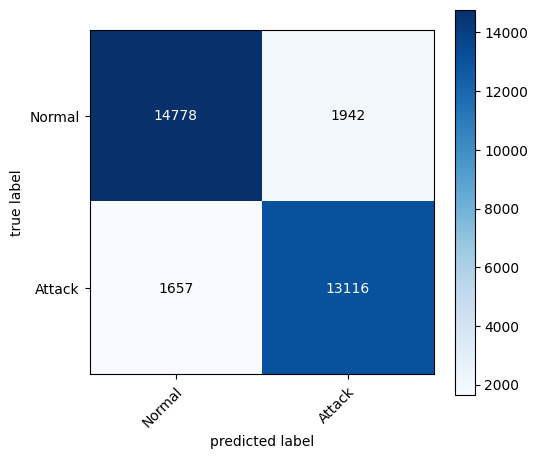

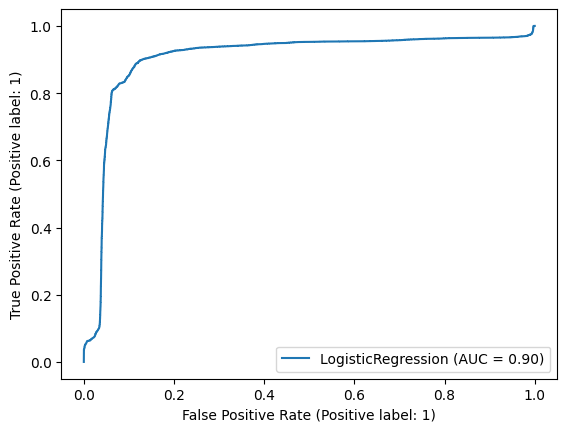

In [36]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)

----------------

## 2. Decision Tree Classifier

In [37]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [38]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9356470750113782, 0.9367478487282889)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.937

The Decision Tree Classifier Model Sensitvity = 0.887

The Decision Tree Classifier Model Precision  = 0.976

The Decision Tree Classifier Model F1 Score   = 0.929

The Decision Tree Classifier Model Recall     = 0.887

--------------------------------------------------



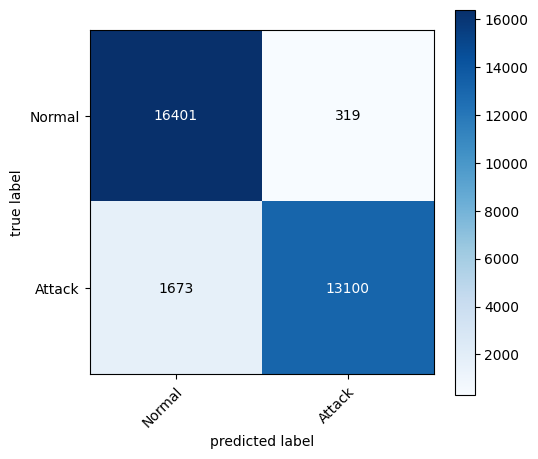

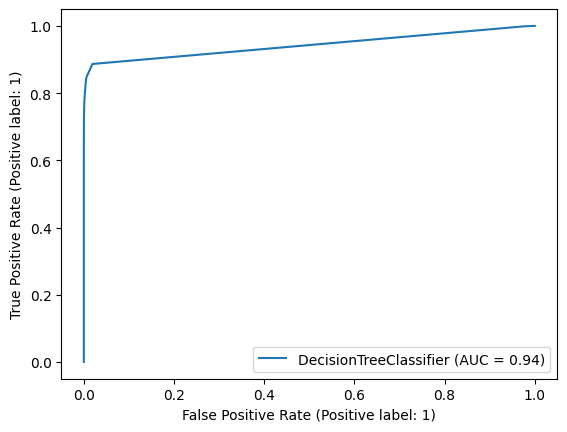

In [39]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

[Text(0.5, 0.9, 'x[37] <= 0.995\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.25, 0.7, 'x[21] <= 0.505\ngini = 0.485\nsamples = 84557\nvalue = [49673, 34884]'),
 Text(0.125, 0.5, 'x[92] <= 0.5\ngini = 0.257\nsamples = 58161\nvalue = [49345, 8816]'),
 Text(0.0625, 0.3, 'x[58] <= 0.5\ngini = 0.223\nsamples = 55703\nvalue = [48583, 7120]'),
 Text(0.03125, 0.1, 'gini = 0.169\nsamples = 53430\nvalue = [48442, 4988]'),
 Text(0.09375, 0.1, 'gini = 0.116\nsamples = 2273\nvalue = [141, 2132]'),
 Text(0.1875, 0.3, 'x[21] <= 0.005\ngini = 0.428\nsamples = 2458\nvalue = [762, 1696]'),
 Text(0.15625, 0.1, 'gini = 0.436\nsamples = 2370\nvalue = [762, 1608]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 88\nvalue = [0, 88]'),
 Text(0.375, 0.5, 'x[26] <= 0.333\ngini = 0.025\nsamples = 26396\nvalue = [328, 26068]'),
 Text(0.3125, 0.3, 'x[1] <= -0.147\ngini = 0.461\nsamples = 834\nvalue = [300, 534]'),
 Text(0.28125, 0.1, 'gini = 0.196\nsamples = 598\nvalue = [66, 532]'),
 Text(0.3437

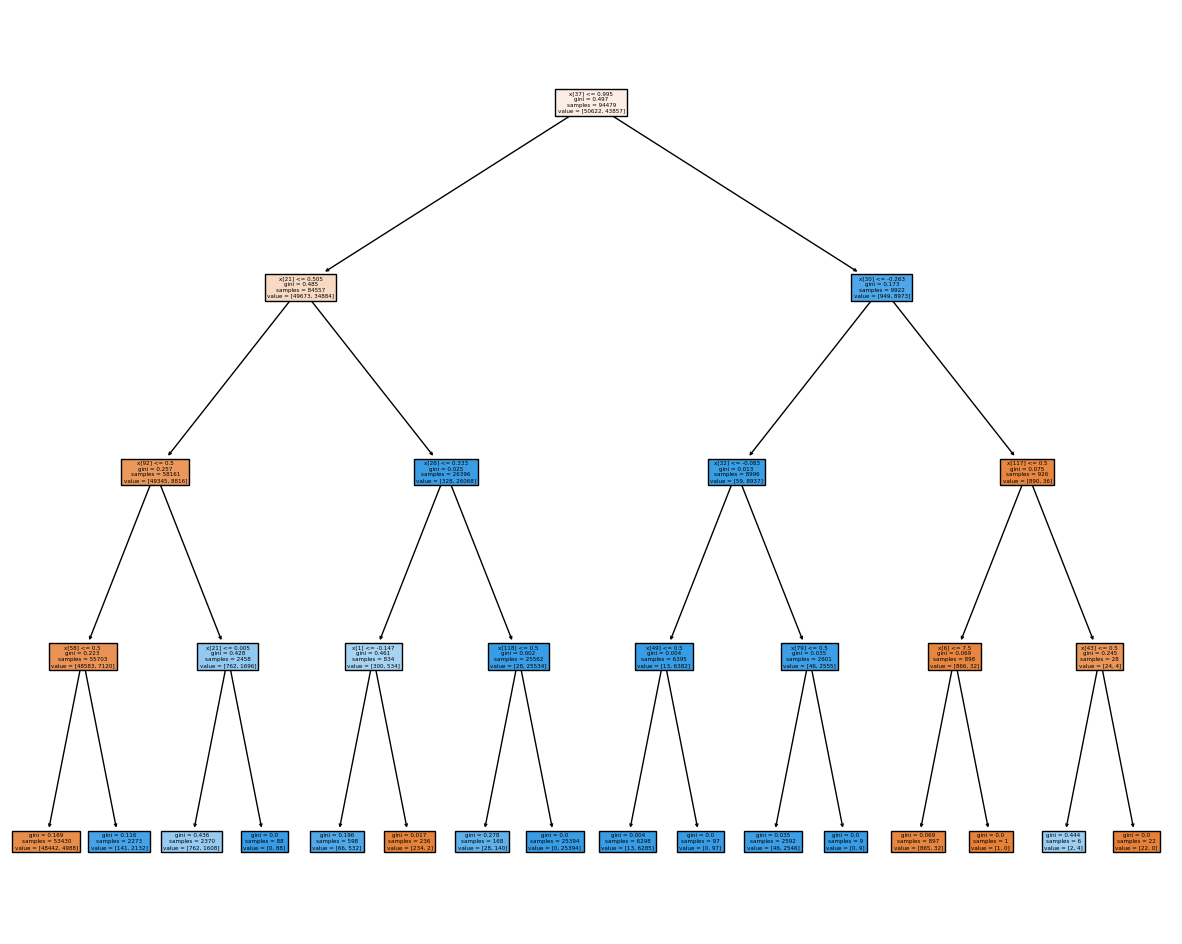

In [40]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

----------------

## 3. Random Forest Classifier

In [41]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [42]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=10)

In [43]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [44]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



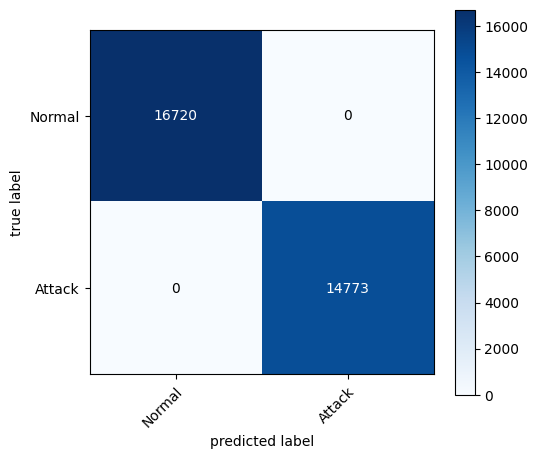

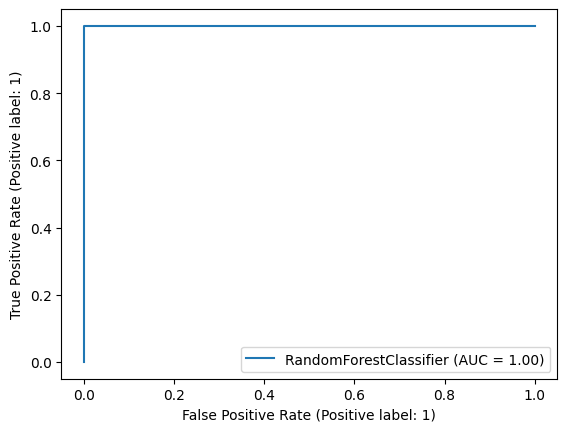

In [45]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

----------------

## 4. KNN-Model

In [46]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



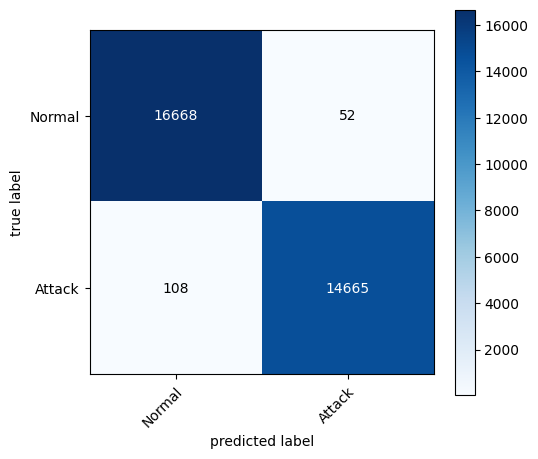

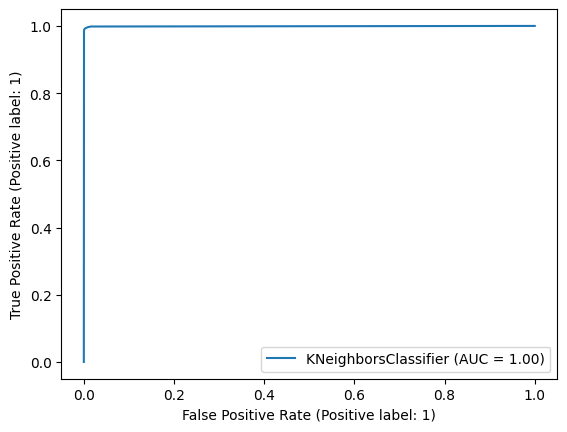

In [48]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

----------------
## 5. SVM Classifier

### 1st Kernel

In [49]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train_train, Y_train_train)

LinearSVC(C=1)

In [50]:
Linear_SVC.score(X_train_train, Y_train_train), Linear_SVC.score(X_test_train, Y_test_train)

(0.9777940071338604, 0.9780268631124377)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.978

The SVM Linear SVC Kernel Model Sensitvity = 0.974

The SVM Linear SVC Kernel Model Precision  = 0.979

The SVM Linear SVC Kernel Model F1 Score   = 0.977

The SVM Linear SVC Kernel Model Recall     = 0.974

--------------------------------------------------



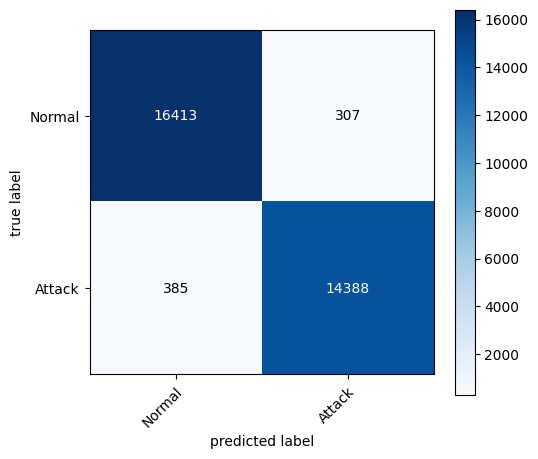

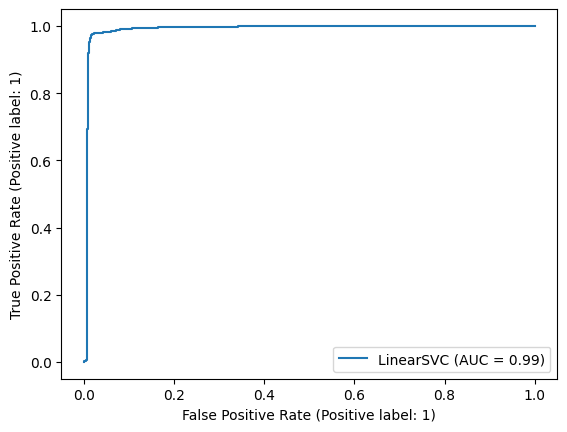

In [51]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test_train, Y_test_train)

----------------
## 6. Gradient Boosting Classifier

In [52]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train_train, Y_train_train)


GradientBoostingClassifier()

In [53]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train_train, Y_train_train))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_test_train, Y_test_train))

Gradient Boosting Classifier Training Score: 1.0
Gradient Boosting Classifier Testing Score: 1.0


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Sensitvity = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

--------------------------------------------------



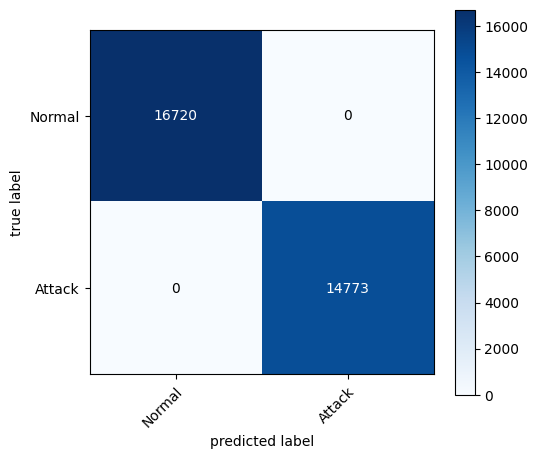

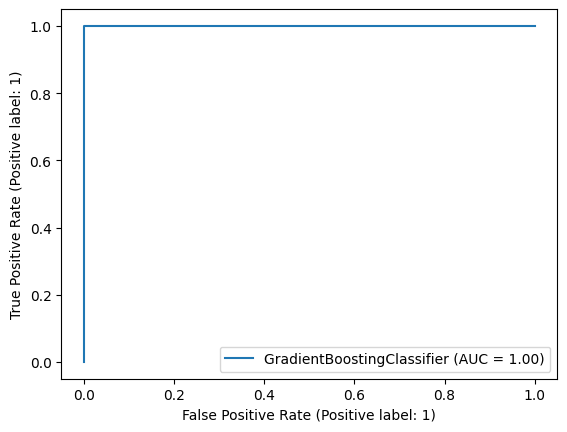

In [54]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test_train, Y_test_train)

----------------

## 7. Extreme Gradient Boosting (XGBoost) Classifier

In [55]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
XGB.fit(X_train_train, Y_train_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train_train, Y_train_train))
print("XGBoost Classifier Testing Score:", XGB.score(X_test_train, Y_test_train))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 1.0


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Sensitvity = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

The XGBoost Classifier Model Recall     = 1.0

--------------------------------------------------



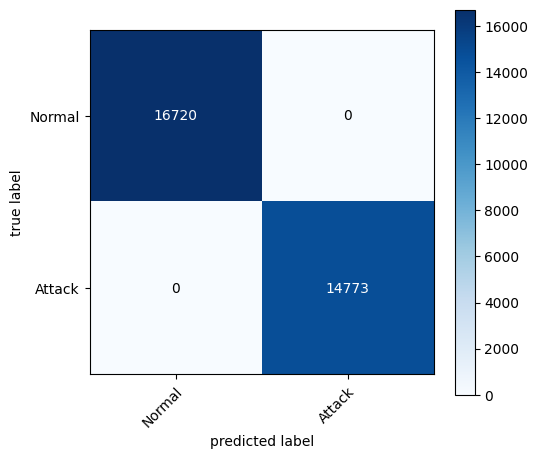

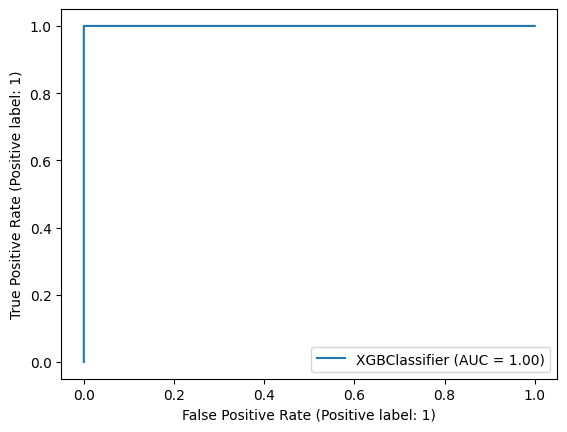

In [57]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_test_train, Y_test_train)

----------------

## 8. Light Gradient Boosting Machine (LGBM) Classifier

In [58]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train_train, Y_train_train)

[LightGBM] [Info] Number of positive: 43857, number of negative: 50622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3344
[LightGBM] [Info] Number of data points in the train set: 94479, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.464198 -> initscore=-0.143452
[LightGBM] [Info] Start training from score -0.143452


LGBMClassifier()

In [59]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train_train, Y_train_train))
print("LGBM Classifier Testing Score:", LGBM.score(X_test_train, Y_test_train))

LGBM Classifier Training Score: 1.0
LGBM Classifier Testing Score: 1.0


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 1.0

The LGBM Classifier Model Sensitvity = 1.0

The LGBM Classifier Model Precision  = 1.0

The LGBM Classifier Model F1 Score   = 1.0

The LGBM Classifier Model Recall     = 1.0

--------------------------------------------------



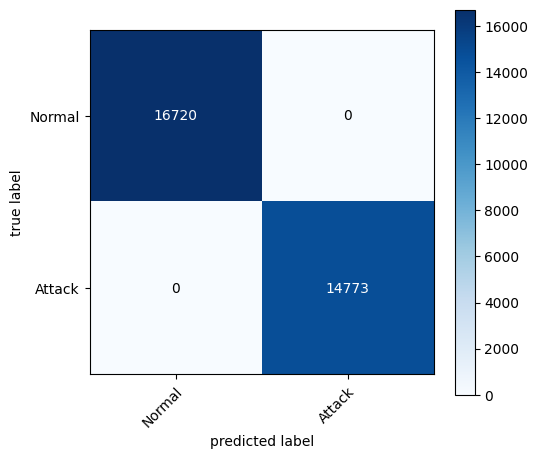

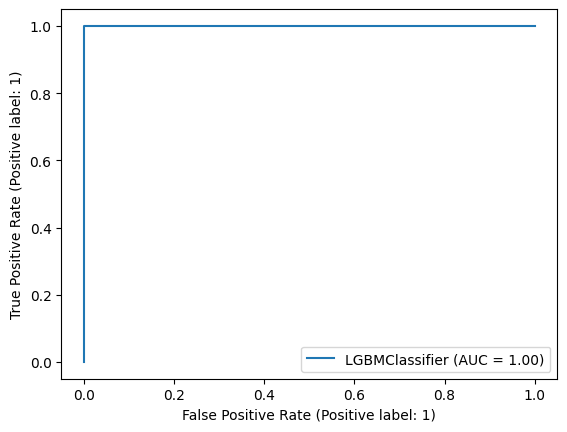

In [60]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_test_train, Y_test_train)

----------------

## 9. CatBoost Classifier

In [61]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,subsample=0.8,random_state=42)
CatBoost.fit(X_train_train, Y_train_train)

0:	learn: 0.3321095	total: 75.5ms	remaining: 7.47s
1:	learn: 0.1647156	total: 97.8ms	remaining: 4.79s
2:	learn: 0.0782885	total: 119ms	remaining: 3.83s
3:	learn: 0.0387168	total: 139ms	remaining: 3.33s
4:	learn: 0.0215072	total: 161ms	remaining: 3.06s
5:	learn: 0.0121028	total: 184ms	remaining: 2.89s
6:	learn: 0.0070558	total: 205ms	remaining: 2.72s
7:	learn: 0.0046970	total: 225ms	remaining: 2.58s
8:	learn: 0.0030828	total: 245ms	remaining: 2.48s
9:	learn: 0.0020953	total: 265ms	remaining: 2.38s
10:	learn: 0.0015056	total: 287ms	remaining: 2.32s
11:	learn: 0.0010918	total: 308ms	remaining: 2.26s
12:	learn: 0.0008235	total: 329ms	remaining: 2.2s
13:	learn: 0.0006622	total: 349ms	remaining: 2.14s
14:	learn: 0.0005300	total: 369ms	remaining: 2.09s
15:	learn: 0.0004402	total: 388ms	remaining: 2.04s
16:	learn: 0.0003796	total: 407ms	remaining: 1.99s
17:	learn: 0.0003556	total: 422ms	remaining: 1.92s
18:	learn: 0.0003354	total: 445ms	remaining: 1.9s
19:	learn: 0.0003332	total: 460ms	remaini

In [62]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train_train, Y_train_train))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_test_train, Y_test_train))


CatBoost Classifier Training Score: 1.0
CatBoost Classifier Testing Score: 1.0


--------------------------------------------------

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Sensitvity = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

The CatBoost Classifier Model Recall     = 1.0

--------------------------------------------------



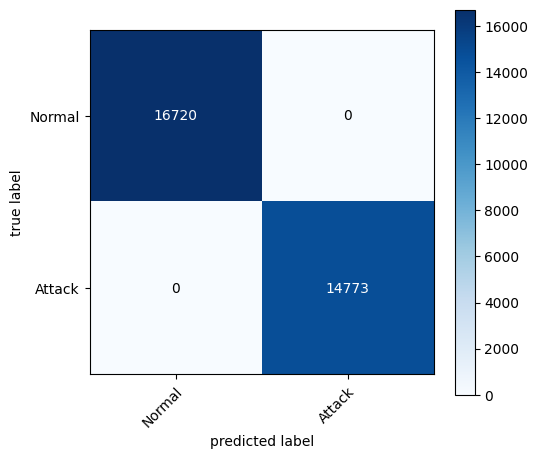

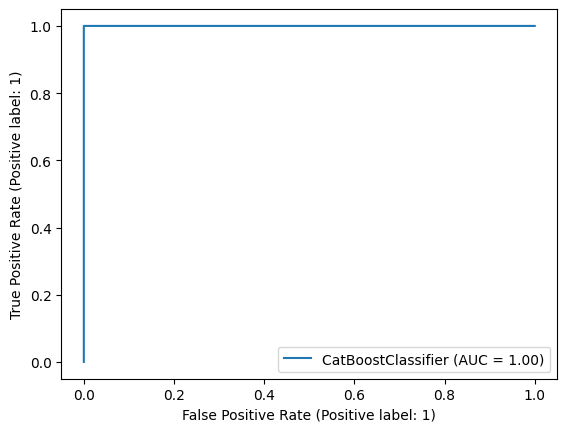

In [63]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_test_train, Y_test_train)

----------------

## 10. Naive Bayes Classifier

In [64]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train_train, Y_train_train)

GaussianNB()

In [65]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train_train, Y_train_train))
print("Naive Bayes Classifier Testing Score:", NB.score(X_test_train, Y_test_train))


Naive Bayes Classifier Training Score: 0.9586786481652008
Naive Bayes Classifier Testing Score: 0.9585622201759121


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.959

The Naive Bayes Classifier Model Sensitvity = 0.978

The Naive Bayes Classifier Model Precision  = 0.936

The Naive Bayes Classifier Model F1 Score   = 0.957

The Naive Bayes Classifier Model Recall     = 0.978

--------------------------------------------------



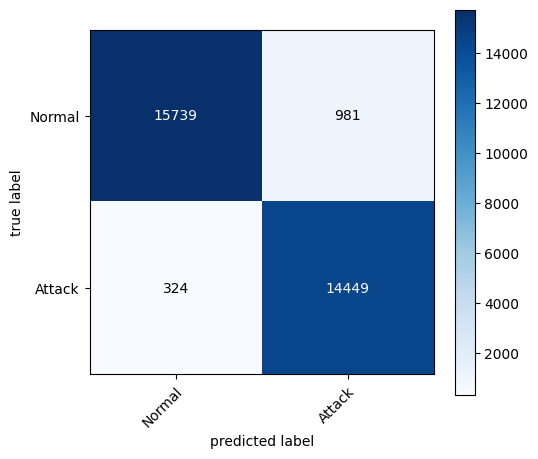

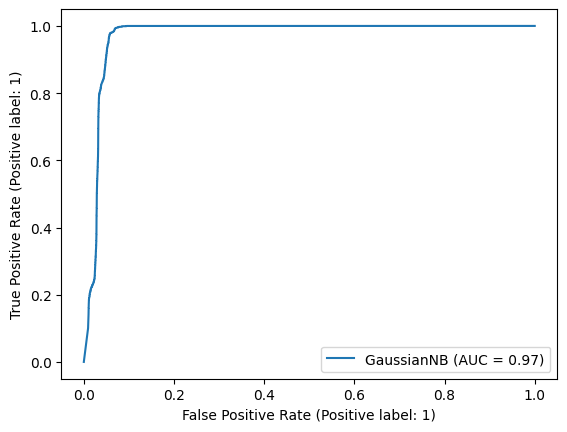

In [66]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_test_train, Y_test_train)

----------------

## 11. Linear Discriminant Analysis (LDA)

In [67]:
# Instantiate the LDA model 
LDA = LinearDiscriminantAnalysis(solver='lsqr')  
LDA.fit(X_train_train, Y_train_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [68]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train_train, Y_train_train))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_test_train, Y_test_train))

Linear Discriminant Analysis Training Score: 0.983128525915812
Linear Discriminant Analysis Testing Score: 0.9827263201346331


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.983

The Linear Discriminant Analysis Model Sensitvity = 0.988

The Linear Discriminant Analysis Model Precision  = 0.976

The Linear Discriminant Analysis Model F1 Score   = 0.982

The Linear Discriminant Analysis Model Recall     = 0.988

--------------------------------------------------



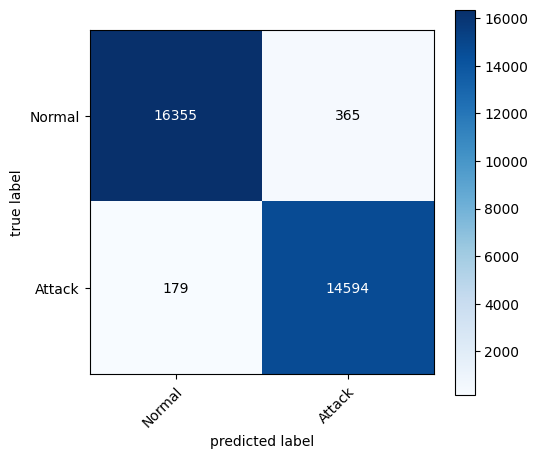

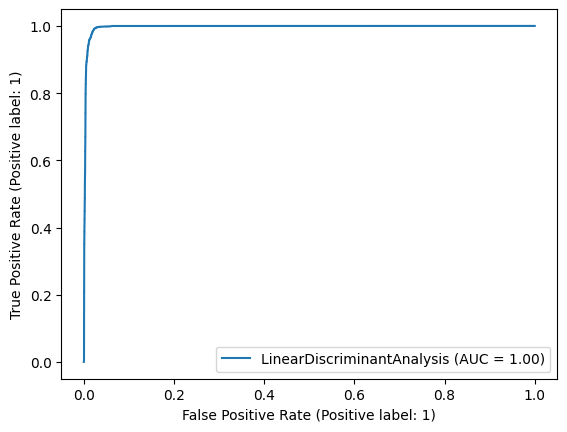

In [69]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_test_train, Y_test_train)


----------------

## 12. Quadratic Discriminant Analysis (QDA)

In [70]:
# Instantiate the QDA model 
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1) 
QDA.fit(X_train_train, Y_train_train)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [71]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train_train, Y_train_train))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_test_train, Y_test_train))


Quadratic Discriminant Analysis Training Score: 0.9879126578393083
Quadratic Discriminant Analysis Testing Score: 0.9874892833328042


----------------

## 13. Passive Aggressive Classifier

In [72]:
# Instantiate the Passive Aggressive Classifier 
PAC = PassiveAggressiveClassifier(C=0.1, max_iter=1000)  
PAC.fit(X_train_train, Y_train_train)

PassiveAggressiveClassifier(C=0.1)

In [73]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", PAC.score(X_train_train, Y_train_train))
print("Passive Aggressive Classifier Testing Score:", PAC.score(X_test_train, Y_test_train))


Passive Aggressive Classifier Training Score: 0.96843743054012
Passive Aggressive Classifier Testing Score: 0.9678023687803639


--------------------------------------------------

The Passive Aggressive Classifier Model Accuracy   = 0.968

The Passive Aggressive Classifier Model Sensitvity = 0.967

The Passive Aggressive Classifier Model Precision  = 0.965

The Passive Aggressive Classifier Model F1 Score   = 0.966

The Passive Aggressive Classifier Model Recall     = 0.967

--------------------------------------------------



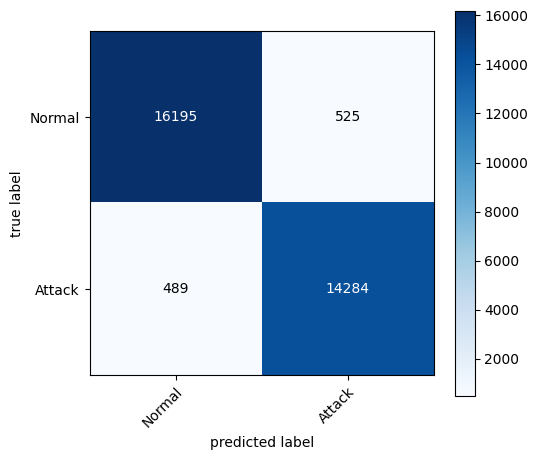

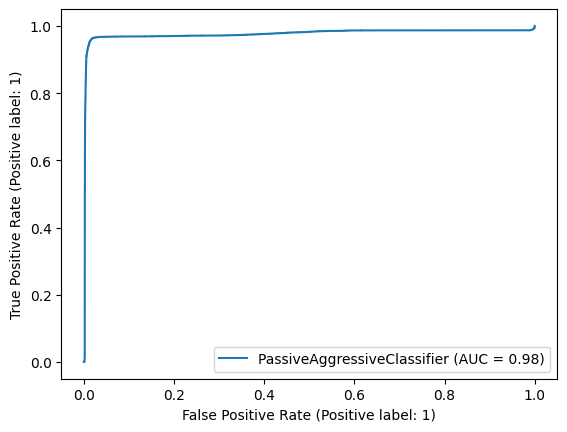

In [74]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', PAC, X_test_train, Y_test_train)

----------------

## 14. AdaBoost Classifier

In [75]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)  

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)  
AdaBoost.fit(X_train_train, Y_train_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         max_features=6),
                   n_estimators=100)

In [76]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train_train, Y_train_train))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_test_train, Y_test_train))

AdaBoost Classifier Training Score: 1.0
AdaBoost Classifier Testing Score: 0.9999047407360366


--------------------------------------------------

The AdaBoost Classifier Model Accuracy   = 1.0

The AdaBoost Classifier Model Sensitvity = 1.0

The AdaBoost Classifier Model Precision  = 1.0

The AdaBoost Classifier Model F1 Score   = 1.0

The AdaBoost Classifier Model Recall     = 1.0

--------------------------------------------------



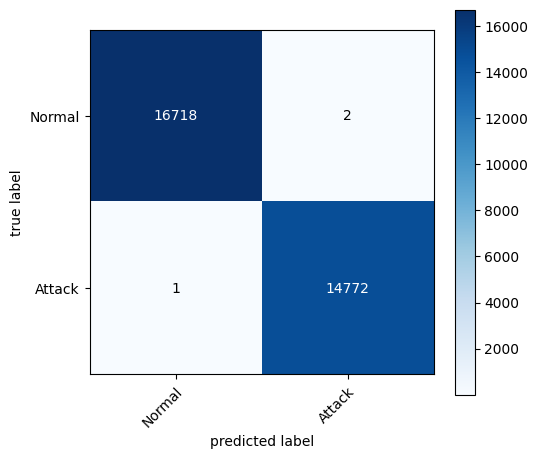

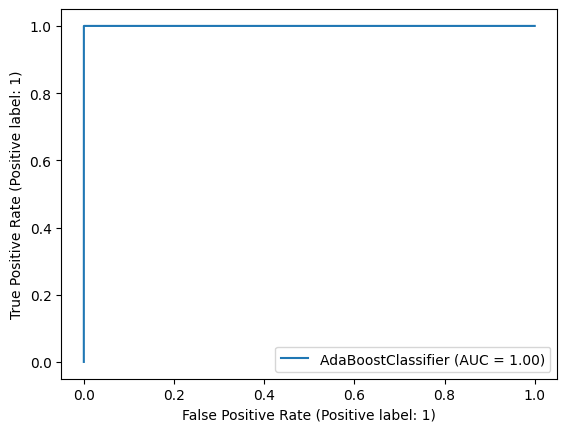

In [77]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_test_train, Y_test_train)

----------------

## 15. Ridge Classifier

In [78]:
# Instantiate the Ridge Classifier 
ridge_classifier = RidgeClassifier(alpha=1.0)  
ridge_classifier.fit(X_train_train, Y_train_train)

RidgeClassifier()

In [79]:
# Print the training and testing scores
print("Ridge Classifier Training Score:", ridge_classifier.score(X_train_train, Y_train_train))
print("Ridge Classifier Testing Score:", ridge_classifier.score(X_test_train, Y_test_train))

Ridge Classifier Training Score: 0.983128525915812
Ridge Classifier Testing Score: 0.9826628139586575


--------------------------------------------------

The Ridge Classifier Model Accuracy   = 0.983

The Ridge Classifier Model Sensitvity = 0.988

The Ridge Classifier Model Precision  = 0.976

The Ridge Classifier Model F1 Score   = 0.982

The Ridge Classifier Model Recall     = 0.988

--------------------------------------------------



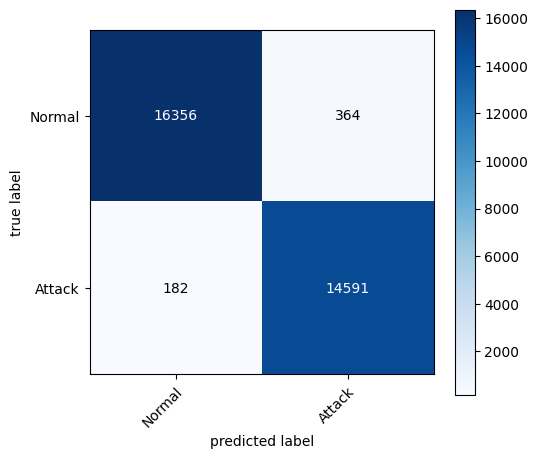

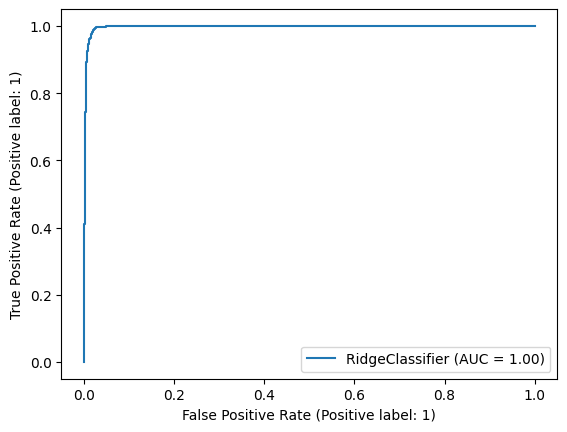

In [80]:
# Evaluate the Ridge Classifier
Evaluate('Ridge Classifier', ridge_classifier, X_test_train, Y_test_train)